In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
life=pd.read_csv("Life Expectancy Data.csv")
life.columns=['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', ' BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria','HIV/AIDS', 'GDP', 'Population',
       'Thinness  1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling']
life

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Batch

In [ ]:
# def LinearBatchDescent(X,y,Constants,learningRate,limit,Lambda):
#     out=y.values
#     previousMSE=np.inf
#     length=len(X.columns)
#     delta=np.zeros(length+1)
#     MSE=0
#     size=X.shape[0]
#     flag=0
#     iterations=0
#     while previousMSE-MSE>=limit:
#         if flag==0:
#             pass
#         else:
#             previousMSE=MSE
#         slopes=Constants[:length]
#         c=Constants[length]
#         Ypred=X.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
#         diff=Ypred-y
#         delta[:length]=X.apply(lambda x:np.sum(2*x*(diff))/size,axis=0).values.tolist()
#         delta[:length] = list(np.array(delta[:length]) + 2 * Lambda * np.array(delta[:length]))
#         delta[length]=2*(Ypred-y).sum()/size
#         prevConstants=Constants
#         Constants=Constants-(delta*learningRate)
#         MSE=((diff**2).sum()+Lambda*(np.sum(np.square(Constants))))/size
#         flag=1
#         iterations=iterations+1
#     return previousMSE,prevConstants,iterations

# def LinearPrediction(X,y,Constants,Lambda):
#     out=y.values
#     length=len(X.columns)
#     slopes=Constants[:length]
#     c=Constants[length]
#     size=X.shape[0]
#     Ypred=X.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
#     MSE=(((Ypred-out)**2).sum()+Lambda*(np.sum(np.square(Constants))))/size
#     return MSE

In [ ]:
def LinearMomentumDescent(X,y,Constants,learningRate,momentumFactor,limit,Lambda):
    out=y.values
    previousMSE=np.inf
    length=len(X.columns)
    delta=np.zeros(length+1)
    MSE=0
    size=X.shape[0]
    flag=0
    iterations=0
    All_delta=[]
    All_Constants=[]
    velocity=[0]*(length+1)
    trainingMSE=[]
    while previousMSE-MSE>=limit:
        if flag==0:
            pass
        else:
            previousMSE=MSE
        slopes=Constants[:length]
        c=Constants[length]
        Ypred=X.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
        diff=Ypred-y
        delta[:length]=X.apply(lambda x:np.sum(2*x*(diff))/size,axis=0).values.tolist()
        delta[:length] = list(np.array(delta[:length]) + 2 * Lambda * np.array(delta[:length]))
        delta[length]=2*(Ypred-y).sum()/size
        if flag==0:
          d=delta
        else:
          d=All_delta[-1]
        velocity = np.array([(learningRate*a) + (b*momentumFactor) for a, b in zip(d, velocity)])
        All_delta.append(delta)
        prevConstants=Constants
        Constants=Constants-velocity
        MSE=((diff**2).sum()+Lambda*(np.sum(np.square(Constants))))/size
        trainingMSE.append(MSE)
        flag=1
        iterations=iterations+1
        All_Constants.append(Constants.copy())
    return previousMSE,prevConstants,iterations,trainingMSE,All_Constants

def LinearPrediction(X,y,Constants,Lambda):
    out=y.values
    length=len(X.columns)
    slopes=Constants[:length]
    c=Constants[length]
    size=X.shape[0]
    Ypred=X.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
    MSE=(((Ypred-out)**2).sum()+Lambda*(np.sum(np.square(Constants))))/size
    return MSE

In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputedData=imp_median.fit_transform(life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']])
life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']]=imputedData
print(life.isna().sum())

Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                     10
Infant Deaths                        0
Alcohol                              0
Percentage Expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
Under-Five Deaths                    0
Polio                                0
Total Expenditure                  226
Diphtheria                           0
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
scaler = StandardScaler()
X=life[['Alcohol', 'Hepatitis B','Measles','Polio','Diphtheria', 'HIV/AIDS']]
X=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)
y=life['Life Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
length=len(X.columns)+1
# Constants=np.random.rand(length)
Constants=np.array([0.71412257, 0.95880379, 0.51390224, 0.93763644, 0.33583024,
       0.15607157, 0.74435779])
learningRate=float(input("Enter the learning Rate you intend to use "))
limit=float(input("Enter the threshold difference between the previousMSE and Current MSE "))
Lambda=float(input("Enter the degree of regularization "))
gama=float(input("Enter the momentum factor "))
lastMSE,Constants,iterations,trainingMSE,All_weights=LinearMomentumDescent(X_train,y_train,Constants,learningRate,gama,limit,Lambda)
# trainMSE,Constants=MomentumSGD(X_train,y_train,Constants,learningRate,limit,Lambda,gama)
testMSE=LinearPrediction(X_test,y_test,Constants,Lambda)
print("The number of iterations for convergence is "+str(iterations))
print("The trainiMSE is "+str(lastMSE)+" and the testMSE is "+str(testMSE))
print("The constants to be used are "+ str(Constants))

Enter the learning Rate you intend to use 0.01
Enter the threshold difference between the previousMSE and Current MSE 0.01
Enter the degree of regularization 0.1
Enter the momentum factor 0.5
The number of iterations for convergence is 127
The trainiMSE is 39.12170248666926 and the testMSE is 39.74141051340775
The constants to be used are [ 2.66880854 -0.71403408 -0.76591381  1.7012705   2.03544262 -4.52913122
 69.03859439]


In [ ]:
# Create a DataFrame
df = pd.DataFrame(All_weights, columns=['Alcohol', 'Hepatitis','Measles','Polio','Diphtheria', 'HIV/AIDS', 'Y-Intercept'])
df['Algo']=['Momentum-Gradient']*df.shape[0]
# Display the DataFrame
print(df)

      Alcohol  Hepatitis   Measles     Polio  Diphtheria  HIV/AIDS  \
0    0.775971   0.966025  0.452974  1.015007    0.420986  0.032844   
1    0.866200   0.974436  0.364185  1.126470    0.543978 -0.148243   
2    0.966926   0.979986  0.265256  1.248341    0.679033 -0.352763   
3    1.068808   0.980377  0.165476  1.368117    0.812586 -0.562835   
4    1.167177   0.974594  0.069522  1.479616    0.937926 -0.769405   
..        ...        ...       ...       ...         ...       ...   
122  2.667668  -0.711898 -0.767230  1.705915    2.030856 -4.527448   
123  2.668064  -0.712634 -0.766776  1.704341    2.032405 -4.528036   
124  2.668444  -0.713346 -0.766338  1.702793    2.033934 -4.528597   
125  2.668809  -0.714034 -0.765914  1.701270    2.035443 -4.529131   
126  2.669158  -0.714699 -0.765504  1.699773    2.036932 -4.529641   

     Y-Intercept               Algo  
0       2.117346  Momentum-Gradient  
1       4.149328  Momentum-Gradient  
2       6.470108  Momentum-Gradient  
3      

In [ ]:
df2=pd.read_csv('gradient.csv')
df_combined = pd.concat([df2, df], ignore_index=True)

df_combined.to_csv('gradient.csv', index=False)

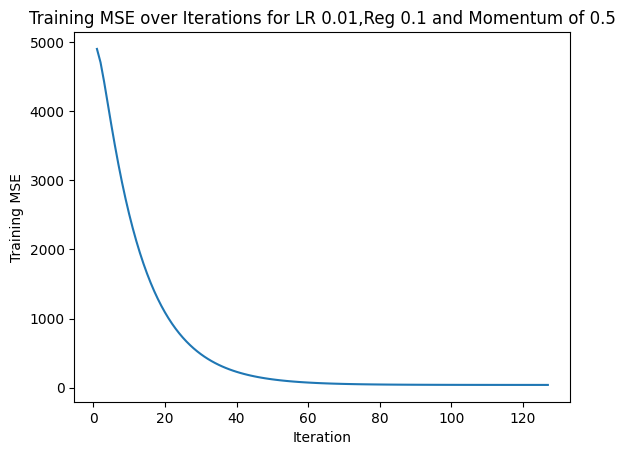

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, iterations + 1), trainingMSE)
plt.xlabel("Iteration")
plt.ylabel("Training MSE")
plt.title("Training MSE over Iterations for LR 0.01,Reg 0.1 and Momentum of 0.5")
plt.show()

In [ ]:
All_testMSE=[]
All_iterations=[]
for i in range(0,11):
  gama=i/10
  print("Momentum is "+str(gama))
  Constants=np.random.rand(length)
  lastMSE,Constants,iterations,trainingMSE=LinearMomentumDescent(X_train,y_train,Constants,0.01,gama,0.01,0.1)
  testMSE=LinearPrediction(X_test,y_test,Constants,Lambda)
  print("MSE is "+str(testMSE))
  All_testMSE.append(testMSE)
  All_iterations.append(iterations)


Momentum is 0.0
MSE is 39.72464758112376
Momentum is 0.1
MSE is 39.722576654293796
Momentum is 0.2
MSE is 39.72339002792801
Momentum is 0.3
MSE is 39.72523317529505
Momentum is 0.4
MSE is 39.73304141239516
Momentum is 0.5
MSE is 39.744549107658734
Momentum is 0.6
MSE is 39.75262027526017
Momentum is 0.7
MSE is 39.78539241742056
Momentum is 0.8
MSE is 41.51384852707733
Momentum is 0.9
MSE is 72.76541051608578
Momentum is 1.0
MSE is 257.29340847592437


In [ ]:
All_gama=[round(0.1*i,1) for i in range(0,11)]
All_gama

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

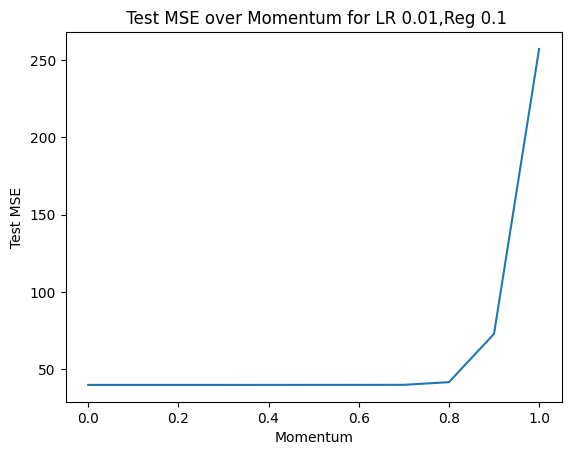

In [ ]:
plt.plot(All_gama, All_testMSE)
plt.xlabel("Momentum")
plt.ylabel("Test MSE")
plt.title(" Test MSE over Momentum for LR 0.01,Reg 0.1")
plt.show()

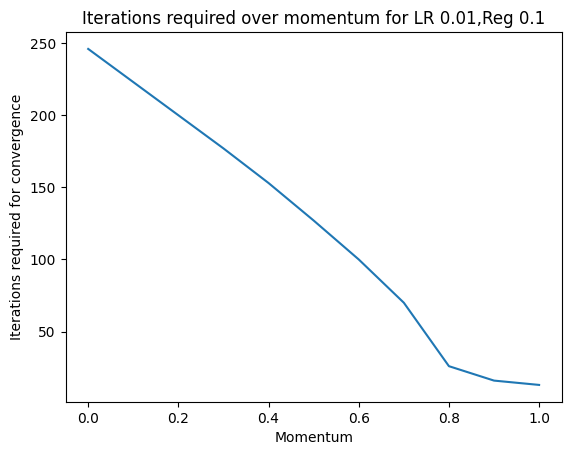

In [ ]:
plt.plot(All_gama, All_iterations)
plt.xlabel("Momentum")
plt.ylabel("Iterations required for convergence")
plt.title("Iterations required over momentum for LR 0.01,Reg 0.1")
plt.show()

In [ ]:
All_testMSE=[]
All_iterations=[]
All_learningRate=[0.01,0.02,0.05,0.07,0.09,0.1,1]
for i in All_learningRate:
  Constants=np.random.rand(length)
  lastMSE,Constants,iterations,trainingMSE=LinearMomentumDescent(X_train,y_train,Constants,i,0.1,0.01,0.1)
  testMSE=LinearPrediction(X_test,y_test,Constants,Lambda)
  # print("MSE is "+str(testMSE))
  All_testMSE.append(testMSE)
  All_iterations.append(iterations)


[39.721927035085805,
 39.74780761276648,
 39.80772680313904,
 39.8283235652466,
 39.84693504098457,
 39.851952433947034,
 5273.772252681973]

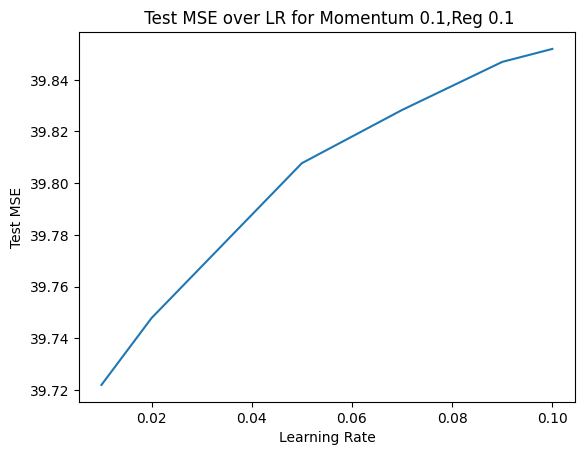

In [ ]:
plt.plot(All_learningRate[:-1], All_testMSE[:-1])
plt.xlabel("Learning Rate")
plt.ylabel("Test MSE")
plt.title(" Test MSE over LR for Momentum 0.1,Reg 0.1")
plt.show()

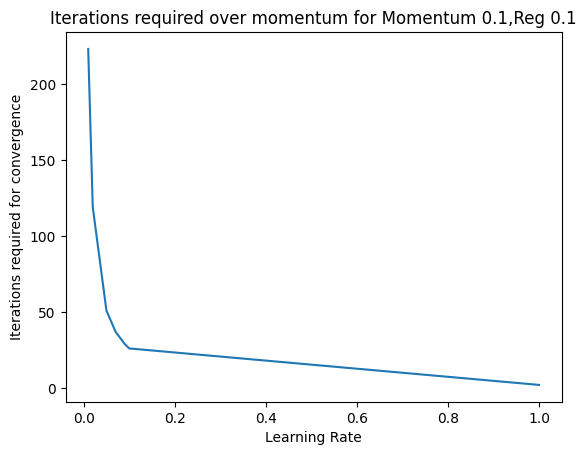

In [ ]:
plt.plot(All_learningRate, All_iterations)
plt.xlabel("Learning Rate")
plt.ylabel("Iterations required for convergence")
plt.title("Iterations required over momentum for Momentum 0.1,Reg 0.1")
plt.show()

In [ ]:
train_data=pd.read_csv("/content/sample_data/california_housing_train.csv")
test_data=pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputedData=imp_median.fit_transform(train_data[['longitude', 'latitude','housing_median_age','total_rooms','total_bedrooms', 'population','households','median_income']])
train_data[['longitude', 'latitude','housing_median_age','total_rooms','total_bedrooms', 'population','households','median_income']]=imputedData
print(train_data.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
